In [1]:
using Color
using Gadfly
using Interact
using ProgressMeter

# Wigner's semicircle law

Quite possibly the most famous result in random matrix theory.

Take a $N\times N$ real symmetric matrix with Gaussian entries and find its eigenvalues. The eigenvalues are distributed according to the semicircle law.

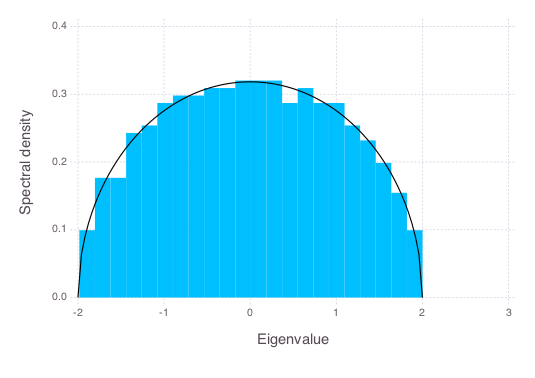

In [2]:
n=500
M=randn(n, n)
M=(M+M')/√2n

xg = linspace(-2, 2, 100)
plot(Coord.Cartesian,
    Guide.xlabel("Eigenvalue"), Guide.ylabel("Spectral density"),
    layer(x=xg, y=√abs(4 - xg.^2)/(2π), Geom.line,
        Theme(default_color=color("black"))
    ),
layer(x=eigvals(M), Geom.histogram(bincount=round(Int,√n), density=true))
)

# Wigner's original paper (1955)...

... was actually not on Gaussian random matrices, but rather, other matrices motivated from nuclear physics.

<img width=700 src="wigner55head.png" />

This paper considers 3 random matrix problems surrounding this type of matrix:

In [3]:
function wigner55(n::Int, N::Int=n, v::Real=1.0)
    T = promote_type(typeof(v*1), typeof(n))
    H = zeros(T, 2n+1, 2n+1)
    for i=1:2n+1
        H[i,i] = i-1-n
    end
    for m = 1:N, j=1:2n+1-m
        H[j,j+m] = v*(2randbool()-1)
    end
    Symmetric(H, :U)
end
wigner55(2, 1, 1)

5x5 Symmetric{Int64}:
 -2  -1   0   0   0
 -1  -1   1   0   0
  0   1   0  -1   0
  0   0  -1   1  -1
  0   0   0  -1   2

Wigner studied three problems:

1. The bandwidth $N = 1$, dimension $n \rightarrow \infty$, with nonzero diagonals.
2. $n = N$ and $v$ are all finite, with zero diagonals.
3. $N \rightarrow \infty, n \rightarrow \infty, v \rightarrow \infty, v^2/N = $ some constant $q$, with nonzero diagonals.

# Problem 1. $N=1$, $n\rightarrow \infty$, nonzero diagonals

<img src="wigner55_4.png" />

## Eigenvectors (Eq. 5b)

...

<img src="wigner55_5b.png" />

Slider{Float64}([Input{Float64}] 2.5,"v",2.5,0.0:0.25:5.0)

Slider{Int64}([Input{Int64}] 21,"k",21,1:41)

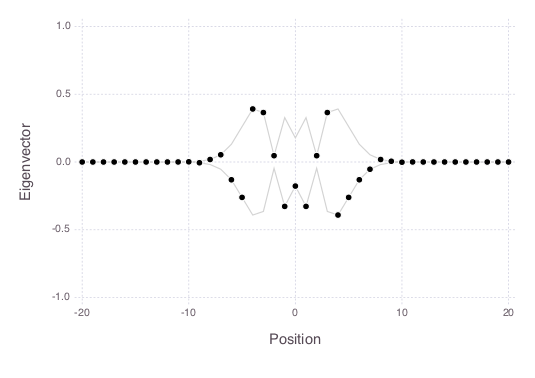

In [4]:
function demo1(n::Int=20)
    @manipulate for v=0.0:0.25:5.0, k=1:2n+1
        E = eigfact!(wigner55(n, 1, v))
        plot(Coord.Cartesian(ymin=-1, ymax=1),
            Guide.ylabel("Eigenvector"), Guide.xlabel("Position"),
            layer(x=-n:n, y=E[:vectors][:,k],
                Geom.point, Theme(default_color=color("black"))),
            layer(x=-n:n, y=map(m->abs(besselj(m-k+(n+1), 2v)), -n:n),
                Geom.line, Theme(default_color=color("lightgrey"))),
            layer(x=-n:n, y=map(m->-abs(besselj(m-k+(n+1), 2v)), -n:n),
                Geom.line, Theme(default_color=color("lightgrey"))),
        )
    end
end
demo1()

# Problem 2. $N=2n$, $n, v$ finite, 0 diagonals

<img src="wigner55_pr2.png" />

In [5]:
function wigner55_2(n::Int, N::Int=n, v::Real=1.0)
    T = promote_type(typeof(v*1), typeof(n))
    H = zeros(T, 2n+1, 2n+1) #Diagonals are now 0
    for m = 1:N, j=1:2n+1-m
        H[j,j+m] = v*(2randbool()-1)
    end
    Symmetric(H, :U)
end
wigner55_2(3, 6, 1)

7x7 Symmetric{Int64}:
  0   1   1   1   1  -1  -1
  1   0  -1   1  -1   1   1
  1  -1   0  -1  -1   1  -1
  1   1  -1   0   1  -1  -1
  1  -1  -1   1   0   1  -1
 -1   1   1  -1   1   0  -1
 -1   1  -1  -1  -1  -1   0

In [6]:
t = 1000 #Number of trials
n = 30 
v = 4 #Magnitude of off-diagonal
evals = zeros(2n+1, t)

@showprogress for i=1:t
    H1 = wigner55_2(n, 2n, v)
    evals[:, i] = eigvals(H1)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


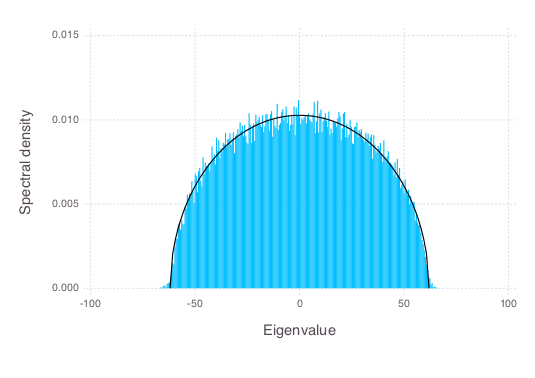

In [7]:
xg = linspace(-v*√8n, v*√8n, 100)
plot(Coord.Cartesian(aspect_ratio=φ),
    Guide.xlabel("Eigenvalue"), Guide.ylabel("Spectral density"),
    layer(x=xg, y=√abs(8n*v^2 - xg.^2)/(4π*n*v^2), Geom.line,
        Theme(default_color=color("black"))
    ),
    layer(x=evals, Geom.histogram(bincount=round(Int,√(t*(2n+1))), density=true))
)

<img src="wigner55_20.png" />

# Problem 3. $N \rightarrow \infty$, $v = \sqrt{qN}$,  nonzero diagonals

<img src="wigner55_pr3.png" />

<img src="wigner55_pr3_2.png" />

In [8]:
q = 100
n = 50
N = 2n
t = 10 #Number of trials
evals = zeros(2n+1, t)

@showprogress for i=1:t
    H = wigner55(n, N, √(q*N))
    evals[:, i] = eigvals(H)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


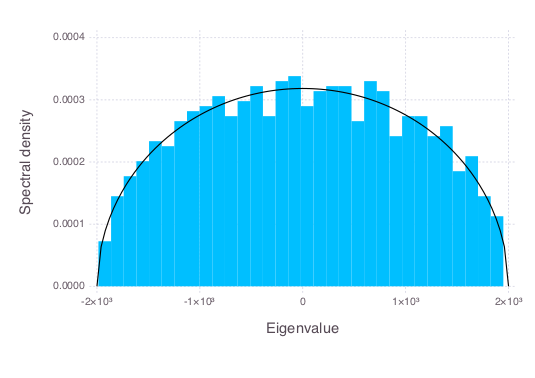

In [9]:
v=√(q*N)
xg = linspace(-v*√4N, v*√4N, 100)
plot(Coord.Cartesian(aspect_ratio=φ),
    Guide.xlabel("Eigenvalue"), Guide.ylabel("Spectral density"),
    layer(x=xg, y=√abs(4N*v^2 - xg.^2)/(2π*N*v^2), Geom.line,
        Theme(default_color=color("black"))
    ),
    layer(x=evals, Geom.histogram(bincount=round(Int,√(t*(2n+1))), density=true))
)

Slider{Float64}([Input{Float64}] 0.0,"logq",0.0,-5.0:0.1:5.0)

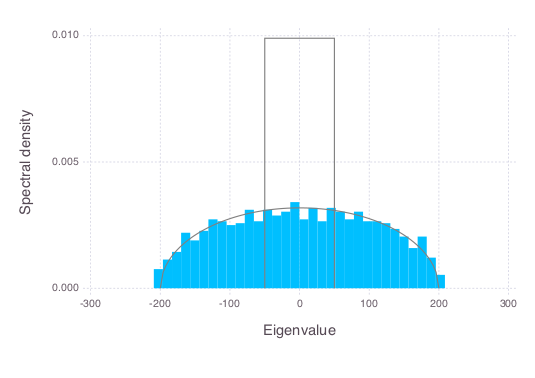

In [10]:
@manipulate for logq = -5:0.1:5
    
    q = 10.0^logq
    n = 50
    N = 2n
    t = 10 #Number of trials
    evals = zeros(2n+1, t)

    for i=1:t
        H = wigner55(n, N, √(q*N))
        evals[:, i] = eigvals(H)
    end    

    v=√(q*N)
    xg = linspace(-v*√4N, v*√4N, 100)
    plot(Coord.Cartesian(aspect_ratio=φ),
        Guide.xlabel("Eigenvalue"), Guide.ylabel("Spectral density"),
        layer(x=xg, y=√abs(4N*v^2 - xg.^2)/(2π*N*v^2), Geom.line,
    Theme(default_color=color("grey"))
        ),
    layer(x=[-n; -n:n; n], y=[0; fill(1/(2n+1), 2n+1); 0], Geom.line,
    Theme(default_color=color("grey"))
        ),
        layer(x=evals, Geom.histogram(bincount=round(Int,√(t*(2n+1))), density=true))
    )
end

<img src="wigner55_pr3_3.png" />

# Some free probability experiments

In [11]:
function samplefree(n, N, t, q)
    v=√(q*N)

    evals1 = zeros(2n+1, t)
    evals2 = zeros(2n+1, t)
    
    #Sample eigenvalues
    @showprogress for i=1:t
        𝐤 = Diagonal(1.0*[-n:n;])
        𝐯 = wigner55_2(n,2n,v) |> full
        Q = full(qrfact!(randn(2n+1, 2n+1))[:Q])
        evals1 = eigvals(𝐤 + 𝐯)
        evals2 = eigvals(Q*full(𝐤)*Q' + 𝐯)
    end
    
    #Compute normalized histograms
    xv, yv1 = hist(evals1, round(Int, √(n*√t)))
    yv1 /= sum(yv1)*diff(xv)[1]
    xv, yv2 = hist(evals2, xv)
    yv2 /= sum(yv2)*diff(xv)[1]

    midpoints(xv), yv1, yv2
end

samplefree (generic function with 1 method)

In [12]:
function plotdensities(xv, yv1, yv2)
    cm = map(x->AlphaColorValue(x, 0.5), palette("Set1", 3)[1:2])
    plot(Guide.xlabel("Eigenvalue"), Guide.ylabel("Density"),
        layer(x=xv, y=yv1, Geom.bar, Theme(default_color=cm[1])),
        layer(x=xv, y=yv2, Geom.bar, Theme(default_color=cm[2])),
        Guide.manual_color_key("", ["exact", "free"], cm), 
    )
end

plotdensities (generic function with 1 method)

In [13]:
@manipulate for logq = -5:0.5:5
    xv, yv1, yv2 = samplefree(30, 2n, 100, 10.0^logq)
    plotdensities(xv, yv1, yv2)
end

Slider{Float64}([Input{Float64}] 0.0,"logq",0.0,-5.0:0.5:5.0)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


LoadError: palette not defined
while loading In[13], in expression starting on line 1